<a href="https://colab.research.google.com/github/timayez/UCDPA_Ayomide/blob/main/main%20predict%20term%20deposit%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Always go back to the kaggle website to understand each step of data


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Importing data from local system and printing first 5 rows.

In [2]:
predic_f= pd.read_csv('/content/Assignment-2_Data.csv.zip') 
predic_f.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
predic_f.tail()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
predic_f.shape
# This shows the number of rows and column in our data (45211 and 18) respectively

(45211, 18)

Exploratory analysis

Summary statistics: Gives us a quick overview of data 

In [5]:
predic_f.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
predic_f.info ()
# Looking at data;
# age: 9 missing value 
# balance: 3 missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


1.1 Data cleaning 

In [ ]:
# Ayo continue with EoinDunne data 

In [7]:
predic_f.isnull().sum() 
# this code returns the number of null-values in each column, age and balance: 9 and 3 respectively

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#Replacing missing age row with the column mean (ref: W3)
age_replace = predic_f["age"].mean() # calculating the mean of "age" column, and assinging to variable "age_replace"
predic_f["age"].fillna(age_replace, inplace= True) # replacing the empty rows in age column with variable "age_replace"

In [14]:
predic_f.isnull().sum() # Now all null values in age has been removed as shown bellow 

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
# remove null values left 
predic_f.dropna(subset=['balance'], inplace=True) #sebest balance specify where python should look for null value

In [17]:
#lets check null value again
predic_f.isnull().sum() # now empty rows are all dealt with

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
# reseting index
predic_f.reset_index(drop=True) #(Eoin Dunne)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45204,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45205,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45206,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [18]:
duplicate = predic_f.duplicated().value_counts() #counting how many duplicate values do we have
print(duplicate) 

False    45208
dtype: int64


In [28]:
#sorting by age
#code by: EoinDunne 
predic_f.sort_values(by=['age'], inplace=True)

In [29]:
#exploring dataframe to spot incorrect/ insequensial entry in our numerical variables
#code by AHMEDOV , A. (2022)
numerical_data = predic_f.select_dtypes(include="number")
numerical_data


,Id,age,balance,day,duration,campaign,pdays,previous
45203,46204,-1.0,113.0,17,266,1,-1,0
45204,46205,-1.0,2850.0,17,300,1,40,8
45205,46206,-1.0,505.0,17,386,2,-1,0
41273,42274,18.0,3.0,25,130,2,-1,0
41252,42253,18.0,5.0,24,143,2,-1,0
...,...,...,...,...,...,...,...,...
44262,45263,93.0,775.0,22,860,2,177,7
31233,32234,94.0,1234.0,3,212,1,-1,0
33699,34700,95.0,2282.0,21,207,17,-1,0
41663,42664,95.0,0.0,1,215,1,-1,0


I sorted the dataframe first in acesinding order so i can veiw the lowest and highest values of age on '.head()' and ".tail()" respectively. This will help me to spot potential wrong entries. For example -1 and 999 are impossible ages so we can assume they are wrong.

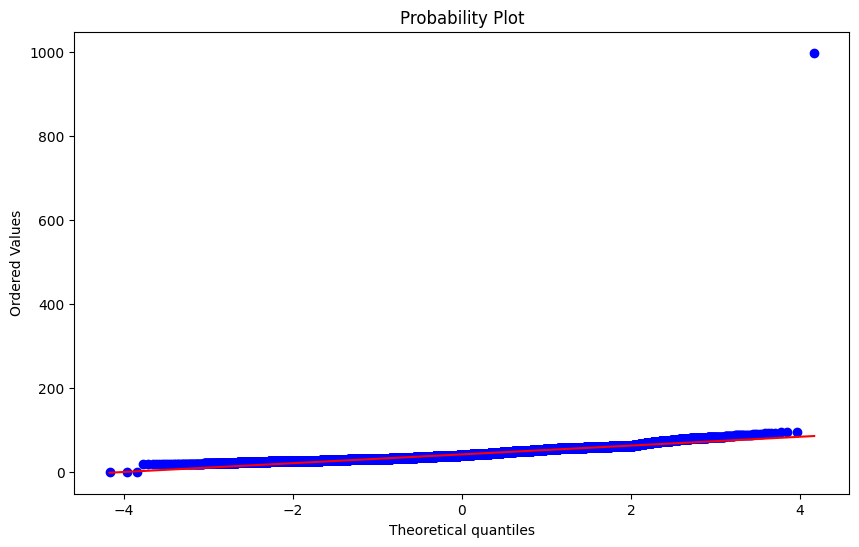

In [33]:
# Creating probability plot to see graphical representation of 'age' (using pyplot module of the matplotlib)
#code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (10, 6) # This set the size of the graph width and height respectively
stats.probplot(predic_f["age"], dist="norm", plot=plt) 
plt.show()
#code summary: plot compare the quantiles of the 'age column' of the dataset to the quantiles of a 'normal distribution'

<Axes: >

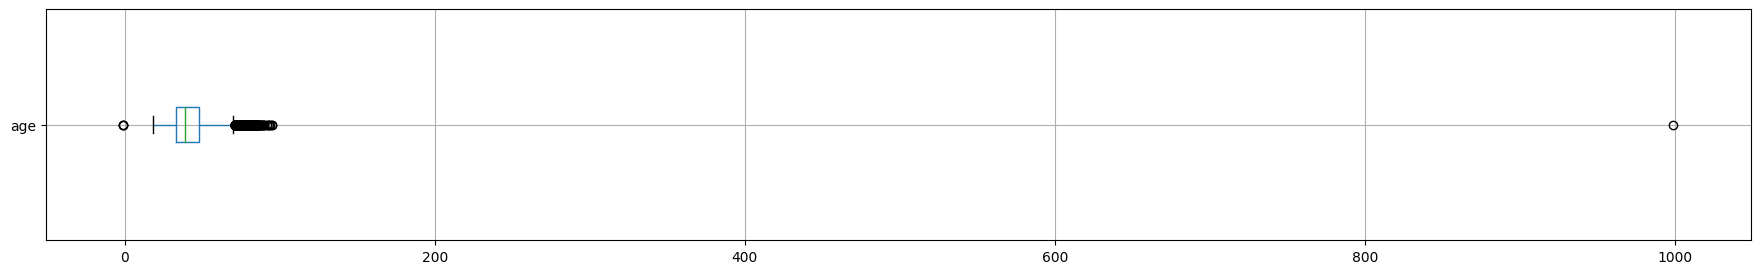

In [34]:
# creating a box sub plot to see plot in numerical form
# code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(predic_f, columns=['age'])
temp_df.boxplot(vert=False)
# Plot shows that 99% of entry are between (0-<200), and 1 towards 1000

In [40]:
#using for loop to iterate the values in age and setting the lowest age at 18years old and higest 120 yeals old
for x in predic_f.index:
  if predic_f.loc[x, "age"] > 120:
    predic_f.loc[x, "age"] = 120
  if predic_f.loc[x, "age"] <= 18:
    predic_f.loc[x, "age"] = 18

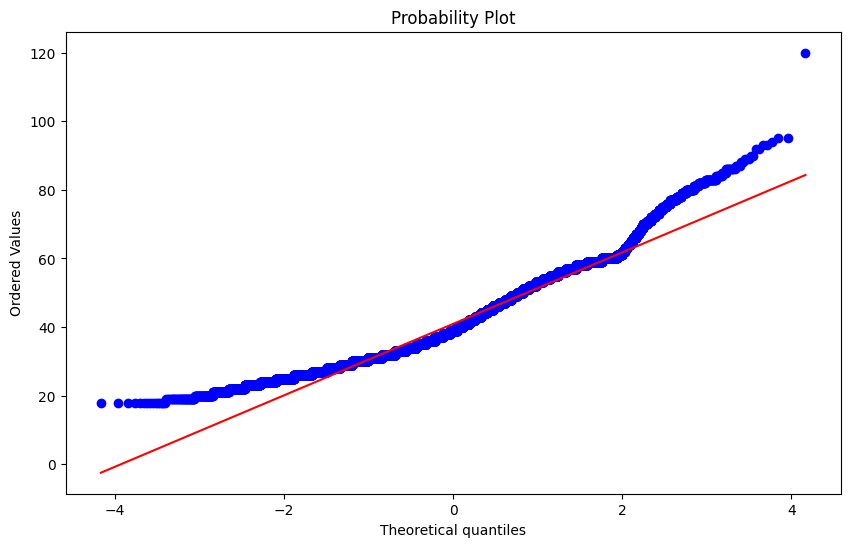

In [41]:
#Checking result visually
# code by AHMEDOV , A. (2022)
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(predic_f["age"], dist="norm", plot=plt)
plt.show()


We've removed the unrealistic values in age column using for loop. setting customers age to 18-120 years old inclusive.

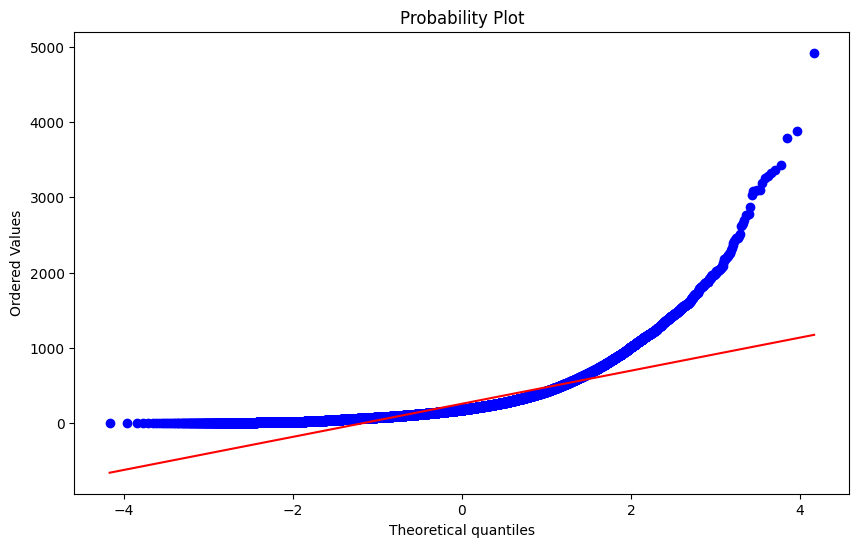

In [42]:
#Plotting duration column 
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(predic_f["duration"], dist="norm", plot=plt)
plt.show()

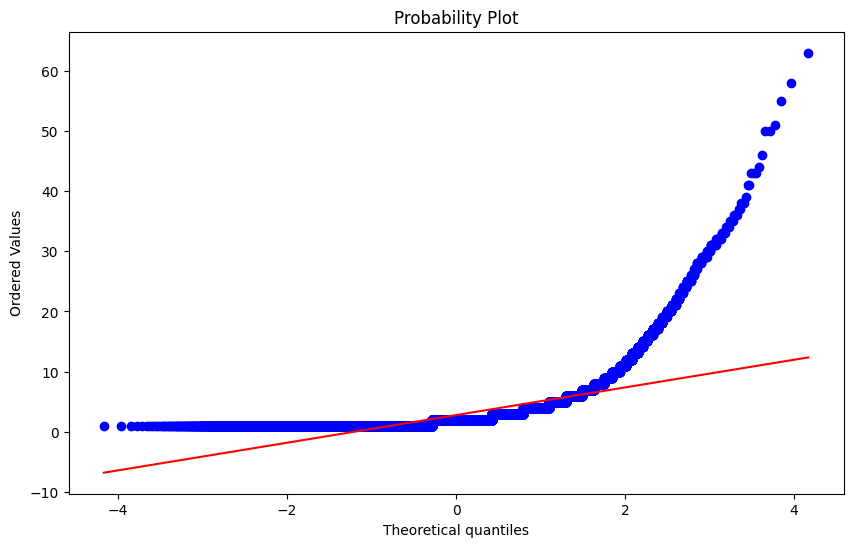

In [43]:
#Plotting campaingn column
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(predic_f['campaign'], dist ="norm", plot = plt)
plt.show()

'y' column according to dataproviders, is the most important column because it shows the banks sucess or otherwise in clear figures. 

# cont with AHMEDOV , A. (2022)

In [ ]:
predic_f.groupby("y").size() # Number of row count in column 'y'. 39911; yes and 5289;No; 39911

y
no     39911
yes     5289
dtype: int64

In [ ]:
# cont with kaggle codes 